In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/Rakshit.Lodha/desktop/10k_Poplar_Tv_Shows.csv')

In [4]:
df = pd.DataFrame(data)

df

,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count
0,False,/iHSwvRVsRyxpX7FE7GbviaDvgGZ.jpg,"[10765, 9648, 35]",119051,['US'],en,Wednesday,"Smart, sarcastic and a little dead inside, Wed...",318.7812,/36xXlhEpQqVVPuiZhfoQuaY4OlA.jpg,2022-11-23,Wednesday,8.392,9781
1,False,/jCcSS9iDpKgll8Kpp7qVhSn0l1f.jpg,[18],194766,['US'],en,The Summer I Turned Pretty,"Every summer, Belly and her family head to the...",266.2929,/xBIz53wYWsKfFpN0TaizVAjKJ0z.jpg,2022-06-16,The Summer I Turned Pretty,8.173,956
2,False,/biIBy2LPOOtGCgUYOls3dUEWU3v.jpg,"[10765, 18]",157239,['US'],en,Alien: Earth,When the mysterious deep space research vessel...,229.4961,/yueXS3q8BtoWekcHOATFHicLl3e.jpg,2025-08-12,Alien: Earth,7.708,427
3,False,/aSGSxGMTP893DPMCvMl9AdnEICE.jpg,"[80, 18, 9648]",1405,['US'],en,Dexter,"Dexter Morgan, a blood spatter pattern analyst...",194.8342,/q8dWfc4JwQuv3HayIZeO84jAXED.jpg,2006-10-01,Dexter,8.215,4900
4,False,/oRdc2nn7jLOYy4fBdvmFKPsKzZE.jpg,"[80, 18, 9648]",2734,['US'],en,Law & Order: Special Victims Unit,"In the criminal justice system, sexually-based...",174.1633,/34O6znqnLHAa19mZrQB0sxTDGzH.jpg,1999-09-20,Law & Order: Special Victims Unit,7.936,4010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,/qvKGzaAAvwo2gsn7CIMk77Z8wVp.jpg,"[16, 35]",13531,"['AU', 'GB', 'US']",en,The Beatles,The Beatles is an American animated television...,2.9645,/gvkbpEK7WbF0uGyuhCaRnwuYyyX.jpg,1965-09-25,The Beatles,5.300,10
9996,False,/uvEL3oA7NZfSbEWIqepmYl1kiFR.jpg,[10764],73068,['KR'],ko,비긴어게인,A variety show gathering some of Korea’s best ...,2.8724,/auRCHtuXwk4OJdir58NFmWOewsT.jpg,2017-06-25,Begin Again,8.000,8
9997,False,NaN,[35],12146,['GB'],en,Shelley,"James Shelley, an educated, sardonic, permanen...",4.5563,/c40fcAxgv9fYSttMN4SCcYAeijl.jpg,1979-07-12,Shelley,8.000,9
9998,False,/lHupHyCG7t4xcJKA60WRpzzYRkR.jpg,[10764],91678,['KR'],ko,퀸덤,A musical battle between 6 trending girl group...,3.4961,/l8zn50A7P7CqCFT3a1Q18u3Uwve.jpg,2019-08-29,Queendom,7.500,13


In [5]:
df.pivot_table(values = 'id', index = 'adult', aggfunc = 'count')

,id
adult,
False,10000


In [6]:
language_pivot = df.pivot_table(values = 'id', index = 'original_language', aggfunc = 'count')

In [7]:
bins = [0,5,7,10]
labels = ['Low', 'Average', 'High']

df['Vote_Group'] = pd.cut(df['vote_average'], bins = bins, labels = labels, right = True)

pivot_vote_group = pd.pivot_table(df, values = 'id', index = 'Vote_Group', aggfunc = 'count', observed = False)

pivot_vote_group['% of total'] = (pivot_vote_group['id']/pivot_vote_group['id'].sum())*100

pivot_vote_group = pivot_vote_group.reset_index()

print(pivot_vote_group)

  Vote_Group    id  % of total
0        Low   633    6.888671
1    Average  3053   33.224508
2       High  5503   59.886821


In [8]:
bins = [0, 100, 200, 350]

label = ['Low', 'Average', 'High']

df['popularity_group'] = pd.cut(df['popularity'], bins = bins, labels = labels, right = True)

pivot_popularity = pd.pivot_table(df, values = 'id', index = 'popularity_group', aggfunc = 'count', observed = False)

pivot_popularity['% of total'] = (pivot_popularity['id']/pivot_popularity['id'].sum())*100

pivot_popularity = pivot_popularity.reset_index()

print(pivot_popularity)

  popularity_group    id  % of total
0              Low  9981       99.81
1          Average    16        0.16
2             High     3        0.03


In [9]:
merged_df = pd.concat([pivot_popularity,pivot_vote_group], axis = 1)

merged_df.columns = ['popularity_group', 'id', 'popularity%', 'vote_group', 'id', 'vote%']

merged_df

,popularity_group,id,popularity%,vote_group,id,vote%
0,Low,9981,99.81,Low,633,6.888671
1,Average,16,0.16,Average,3053,33.224508
2,High,3,0.03,High,5503,59.886821


<Axes: xlabel='popularity_group'>

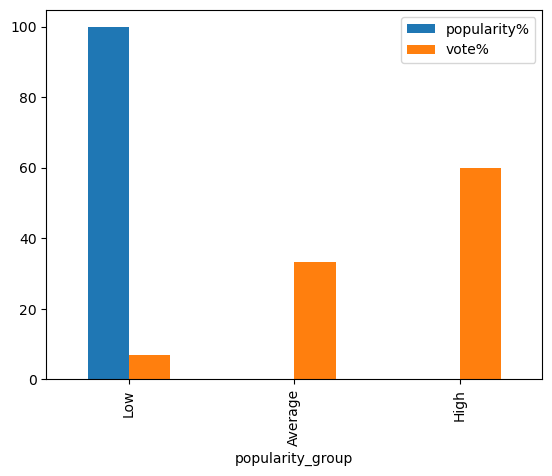

In [10]:
merged_df.plot(kind = 'bar',x = 'popularity_group', y = ['popularity%','vote%'])

In [11]:
df

,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count,Vote_Group,popularity_group
0,False,/iHSwvRVsRyxpX7FE7GbviaDvgGZ.jpg,"[10765, 9648, 35]",119051,['US'],en,Wednesday,"Smart, sarcastic and a little dead inside, Wed...",318.7812,/36xXlhEpQqVVPuiZhfoQuaY4OlA.jpg,2022-11-23,Wednesday,8.392,9781,High,High
1,False,/jCcSS9iDpKgll8Kpp7qVhSn0l1f.jpg,[18],194766,['US'],en,The Summer I Turned Pretty,"Every summer, Belly and her family head to the...",266.2929,/xBIz53wYWsKfFpN0TaizVAjKJ0z.jpg,2022-06-16,The Summer I Turned Pretty,8.173,956,High,High
2,False,/biIBy2LPOOtGCgUYOls3dUEWU3v.jpg,"[10765, 18]",157239,['US'],en,Alien: Earth,When the mysterious deep space research vessel...,229.4961,/yueXS3q8BtoWekcHOATFHicLl3e.jpg,2025-08-12,Alien: Earth,7.708,427,High,High
3,False,/aSGSxGMTP893DPMCvMl9AdnEICE.jpg,"[80, 18, 9648]",1405,['US'],en,Dexter,"Dexter Morgan, a blood spatter pattern analyst...",194.8342,/q8dWfc4JwQuv3HayIZeO84jAXED.jpg,2006-10-01,Dexter,8.215,4900,High,Average
4,False,/oRdc2nn7jLOYy4fBdvmFKPsKzZE.jpg,"[80, 18, 9648]",2734,['US'],en,Law & Order: Special Victims Unit,"In the criminal justice system, sexually-based...",174.1633,/34O6znqnLHAa19mZrQB0sxTDGzH.jpg,1999-09-20,Law & Order: Special Victims Unit,7.936,4010,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,/qvKGzaAAvwo2gsn7CIMk77Z8wVp.jpg,"[16, 35]",13531,"['AU', 'GB', 'US']",en,The Beatles,The Beatles is an American animated television...,2.9645,/gvkbpEK7WbF0uGyuhCaRnwuYyyX.jpg,1965-09-25,The Beatles,5.300,10,Average,Low
9996,False,/uvEL3oA7NZfSbEWIqepmYl1kiFR.jpg,[10764],73068,['KR'],ko,비긴어게인,A variety show gathering some of Korea’s best ...,2.8724,/auRCHtuXwk4OJdir58NFmWOewsT.jpg,2017-06-25,Begin Again,8.000,8,High,Low
9997,False,NaN,[35],12146,['GB'],en,Shelley,"James Shelley, an educated, sardonic, permanen...",4.5563,/c40fcAxgv9fYSttMN4SCcYAeijl.jpg,1979-07-12,Shelley,8.000,9,High,Low
9998,False,/lHupHyCG7t4xcJKA60WRpzzYRkR.jpg,[10764],91678,['KR'],ko,퀸덤,A musical battle between 6 trending girl group...,3.4961,/l8zn50A7P7CqCFT3a1Q18u3Uwve.jpg,2019-08-29,Queendom,7.500,13,High,Low


In [18]:
df['first_air_date'] = pd.to_datetime(df['first_air_date'])

df.set_index('first_air_date')

,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,name,vote_average,vote_count,Vote_Group,popularity_group
first_air_date,,,,,,,,,,,,,,,
2022-11-23,False,/iHSwvRVsRyxpX7FE7GbviaDvgGZ.jpg,"[10765, 9648, 35]",119051,['US'],en,Wednesday,"Smart, sarcastic and a little dead inside, Wed...",318.7812,/36xXlhEpQqVVPuiZhfoQuaY4OlA.jpg,Wednesday,8.392,9781,High,High
2022-06-16,False,/jCcSS9iDpKgll8Kpp7qVhSn0l1f.jpg,[18],194766,['US'],en,The Summer I Turned Pretty,"Every summer, Belly and her family head to the...",266.2929,/xBIz53wYWsKfFpN0TaizVAjKJ0z.jpg,The Summer I Turned Pretty,8.173,956,High,High
2025-08-12,False,/biIBy2LPOOtGCgUYOls3dUEWU3v.jpg,"[10765, 18]",157239,['US'],en,Alien: Earth,When the mysterious deep space research vessel...,229.4961,/yueXS3q8BtoWekcHOATFHicLl3e.jpg,Alien: Earth,7.708,427,High,High
2006-10-01,False,/aSGSxGMTP893DPMCvMl9AdnEICE.jpg,"[80, 18, 9648]",1405,['US'],en,Dexter,"Dexter Morgan, a blood spatter pattern analyst...",194.8342,/q8dWfc4JwQuv3HayIZeO84jAXED.jpg,Dexter,8.215,4900,High,Average
1999-09-20,False,/oRdc2nn7jLOYy4fBdvmFKPsKzZE.jpg,"[80, 18, 9648]",2734,['US'],en,Law & Order: Special Victims Unit,"In the criminal justice system, sexually-based...",174.1633,/34O6znqnLHAa19mZrQB0sxTDGzH.jpg,Law & Order: Special Victims Unit,7.936,4010,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965-09-25,False,/qvKGzaAAvwo2gsn7CIMk77Z8wVp.jpg,"[16, 35]",13531,"['AU', 'GB', 'US']",en,The Beatles,The Beatles is an American animated television...,2.9645,/gvkbpEK7WbF0uGyuhCaRnwuYyyX.jpg,The Beatles,5.300,10,Average,Low
2017-06-25,False,/uvEL3oA7NZfSbEWIqepmYl1kiFR.jpg,[10764],73068,['KR'],ko,비긴어게인,A variety show gathering some of Korea’s best ...,2.8724,/auRCHtuXwk4OJdir58NFmWOewsT.jpg,Begin Again,8.000,8,High,Low
1979-07-12,False,NaN,[35],12146,['GB'],en,Shelley,"James Shelley, an educated, sardonic, permanen...",4.5563,/c40fcAxgv9fYSttMN4SCcYAeijl.jpg,Shelley,8.000,9,High,Low


In [23]:
group_by_year = df.groupby(df['first_air_date'].dt.year)['id'].count().reset_index()

group_by_year.columns = ['Year','Count']

group_by_year

,Year,Count
0,1944.0,1
1,1947.0,3
2,1948.0,4
3,1949.0,4
4,1950.0,11
...,...,...
75,2021.0,462
76,2022.0,476
77,2023.0,497
78,2024.0,494


<Axes: xlabel='Year'>

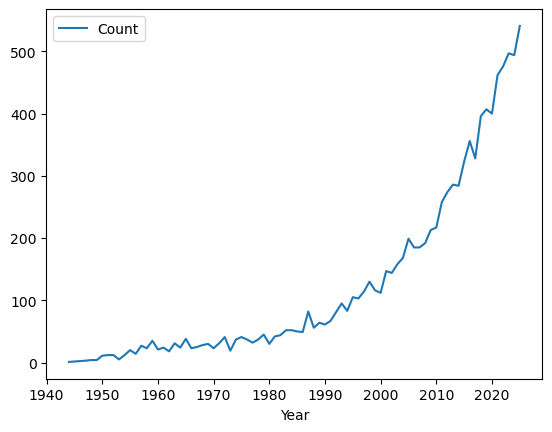

In [25]:
group_by_year.plot(x = 'Year', y = ['Count'])

<Axes: xlabel='first_air_date'>

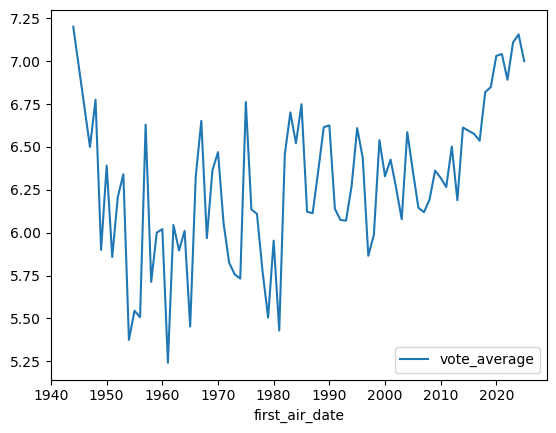

In [28]:
group_by_mean_rating = df.groupby(df['first_air_date'].dt.year)['vote_average'].mean().reset_index()

group_by_mean_rating.plot(x = 'first_air_date', y = 'vote_average')